# Simple linear regression


### Housing Data

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s


### Setup
`pip install seaborn`

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns


## Loading data


In [7]:
df = pd.read_excel("../T03-0 - Data/housing_data.xlsx",)

df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data exploratory


### Histogram


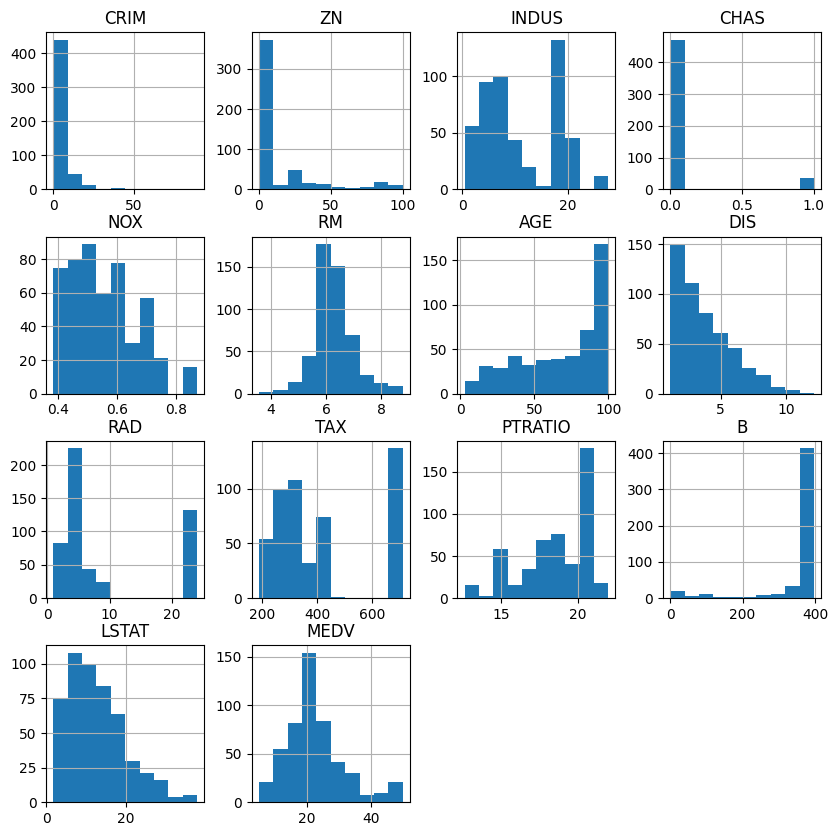

In [8]:
df.hist(figsize=(10, 10))
display()


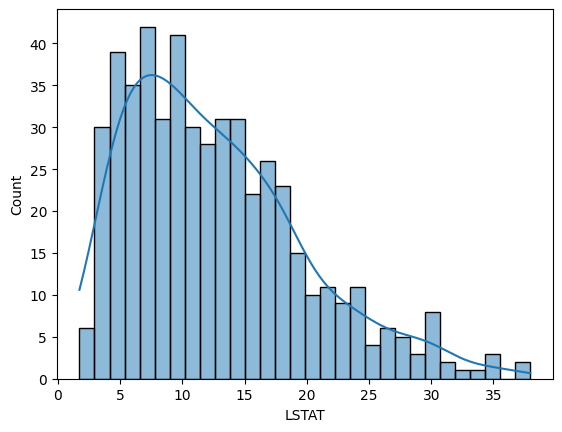

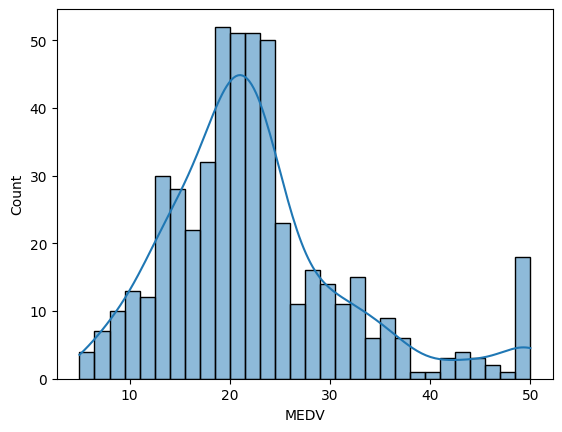

In [9]:
cols = ["LSTAT", "MEDV"]
for col in cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=30, kde=True)


### Pairplot


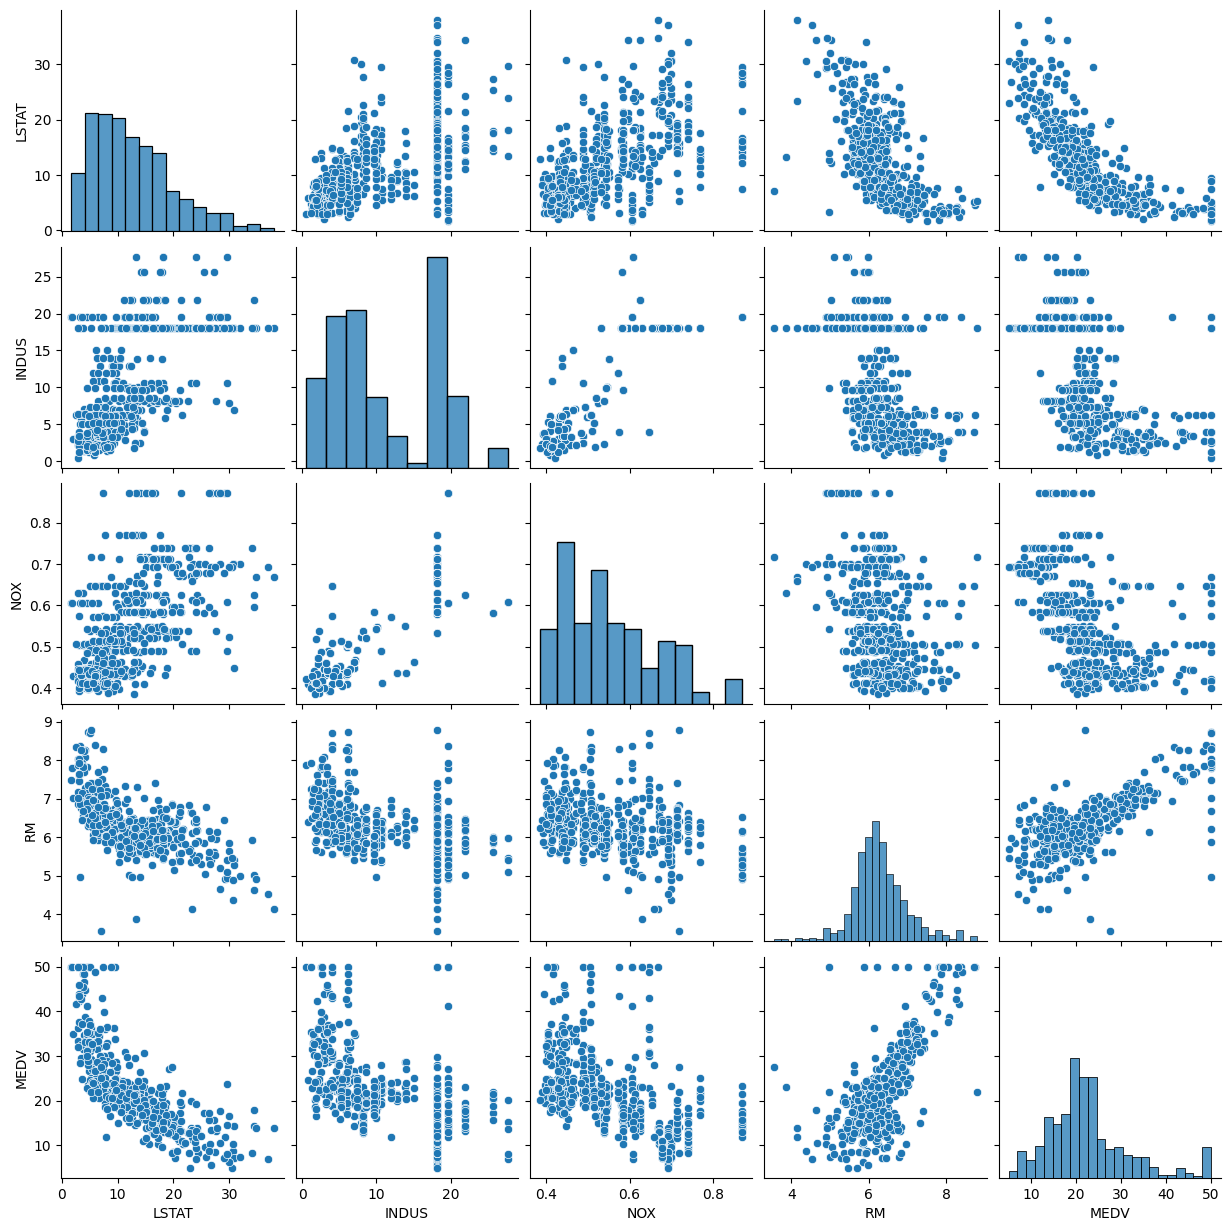

In [10]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])


### Correlation matrix


In [11]:
corr = df.corr()
display(corr)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

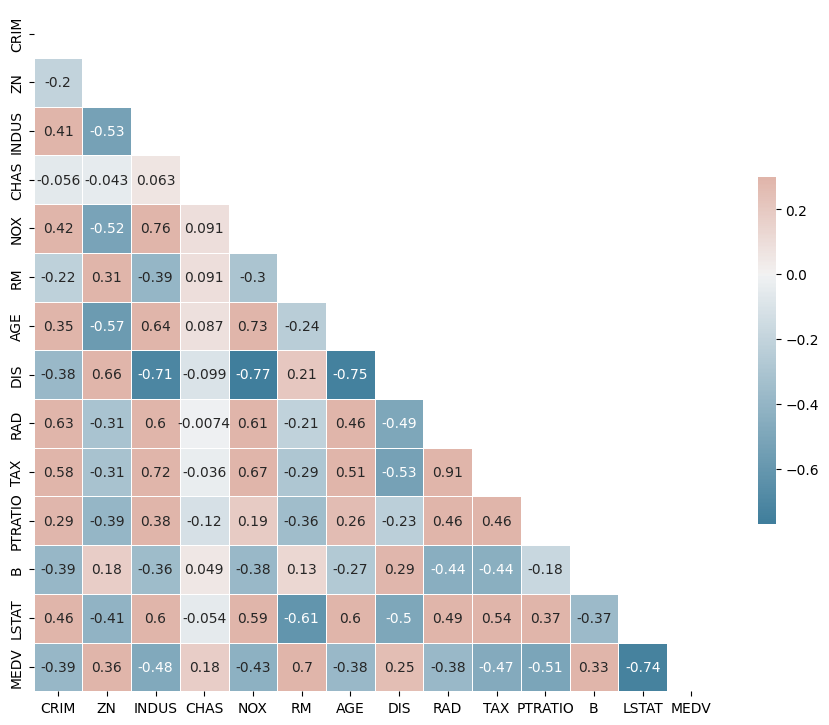

In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)



## Extract and split data


In [13]:
# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values


In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



## Model training


In [15]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

print("Slope: %.3f" % slr.coef_[0])
print("Intercept: %.3f" % slr.intercept_)



Slope: -0.968
Intercept: 34.790


## Evaluation


In [16]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


### Plotting


In [17]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return



Text(0.02, 0.5, 'Median value of homes in $1000s [MEDV]')

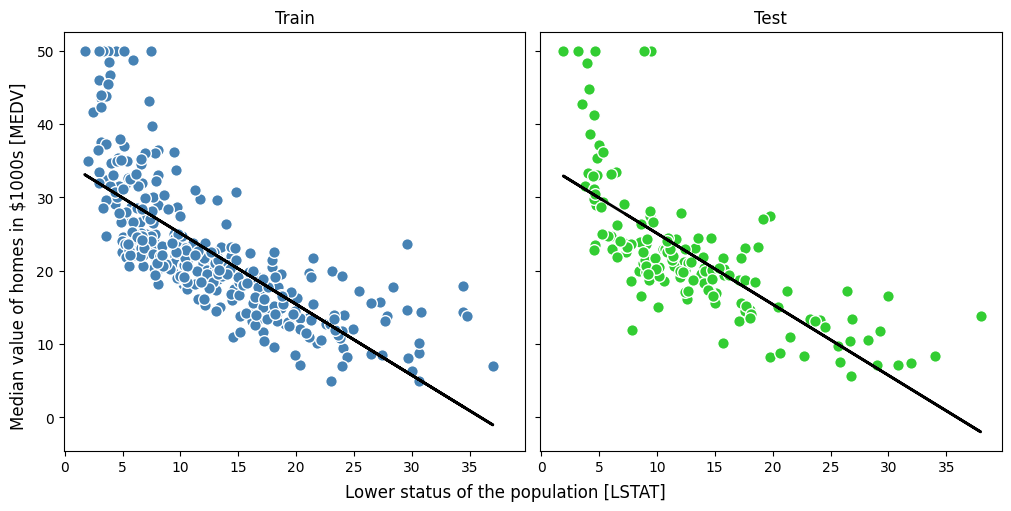

In [18]:
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
)
reg_plot(ax=ax[0], X=X_train, y=y_train, y_pred=y_train_pred, title="Train")
reg_plot(
    ax=ax[1], X=X_test, y=y_test, y_pred=y_test_pred, title="Test", color="limegreen"
)
fig.supxlabel("Lower status of the population [LSTAT]")
fig.supylabel("Median value of homes in $1000s [MEDV]")



## Residual plot


In [19]:
def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


Text(0.02, 0.5, 'Residual')

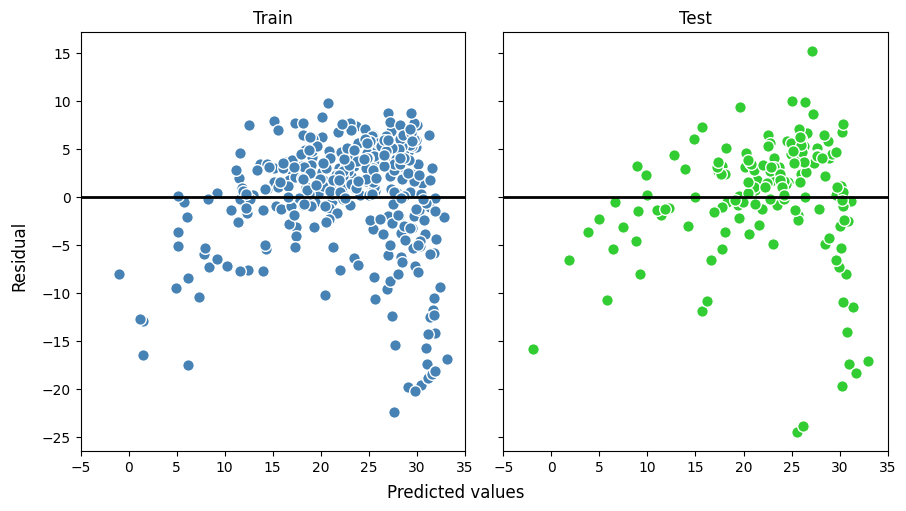

In [20]:
fig, ax = plt.subplots(
    1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
)
res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
ax[0].set_xlim([-5, 35])
fig.supxlabel("Predicted values")
fig.supylabel("Residual")


### R2 and MSE


In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

data = {
    "Model": "Simple linear regression",
    "Coef": slr.coef_[0],
    "Intercept": slr.intercept_,
    "MSE Train": [MSE_train],
    "MSE Test": [MSE_test],
    "R2 Train": [R2_train],
    "R2 Test": [R2_test],
}

dft = pd.DataFrame(data=data)

display(dft)


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test
0,Simple linear regression,-0.968141,34.789781,37.933978,39.817151,0.552478,0.521805
